## Data Understanding

In [1]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
%matplotlib inline

### Dataset Description
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [2]:
# Loading the dataset
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
# Display the first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Assuming df is your DataFrame
filtered_df = df[df['bedrooms'] == 33]
filtered_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [5]:
# Display a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# Display summary statistics for numerical features
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Count numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print the counts
print("Number of numerical columns:", len(numerical_cols))
print("Number of categorical columns:", len(categorical_cols))

Number of numerical columns: 19
Number of categorical columns: 2


In [8]:
# Check unique values
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [9]:
# Check duplicated items
df.duplicated().sum()

0

In [10]:
# Unique values for categorical features
print(df['waterfront'].value_counts())
print(df['view'].value_counts())
print(df['condition'].value_counts())
print(df['grade'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

waterfront      2376
view              63
yr_renovated    3842
dtype: int64


### Data Preparation

#### Data Cleaning

In [12]:
# Correcting data types
df['date'] = pd.to_datetime(df['date'])
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
df.isnull().sum() * 100 / len(df)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     2.102144
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

- waterfront is a binary variable 0 indicating whether the property has a waterfront view 1 indicating that is has a waterfront. Filling the missing values with 0 would be the best approach since most houses do not have a waterfront.
- view represents how many times a house was viewed. We can drop the null values since they represent about 0.3% of the dataset.
- sqft_basement represents the square footage of the basement. Missing values might indicate properties without basements. We will therefore fill the missing values with 0.
- yr_renovated indicates the year a property was renovated. Missing values might suggest properties that haven't been renovated. We will therefore impute missing values with 0.

In [14]:
# Check for any columns sharing a duplicate id
# Find and display duplicated records based on 'id'
duplicates = df[df.duplicated(subset=['id'], keep=False)].sort_values(by='id')

# Count the number of duplicated records
duplicates_len = len(duplicates)

# Display results
print(f"Results:\nThere are {duplicates_len} duplicated records based on 'id'.")

Results:
There are 353 duplicated records based on 'id'.


In [15]:
# Handling missing values
df['waterfront'].fillna(0, inplace=True)  # Assuming NaN means no waterfront
df['sqft_basement'].fillna(0, inplace=True)  # Assuming NaN means no basement
df['yr_renovated'].fillna(0, inplace=True)  # Assuming NaN means no renovation
df.dropna(subset=['view'], inplace=True)
df['bedrooms'] = df['bedrooms'].replace(33, 3)

# Drop the 'id' column from df
df.drop('id', inplace=True, axis=1)

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
# Cap outliers in 'price' column
lower_bound = df['price'].quantile(0.01)
upper_bound = df['price'].quantile(0.99)
df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

In [17]:
# Feature engineering
df['house_age'] = 2024 - df['yr_built']

### Data Exploration and Analysis

In [19]:
# Create a scatter plot of house prices
import plotly.express as px

fig = px.scatter_geo(df,
                     lat='lat',
                     lon='long',
                     color='price',
                     color_continuous_scale='viridis',
                     title='House Prices by Location',
                     labels={'price': 'Price'},
                     projection='natural earth')

# Show the plot
fig.show()


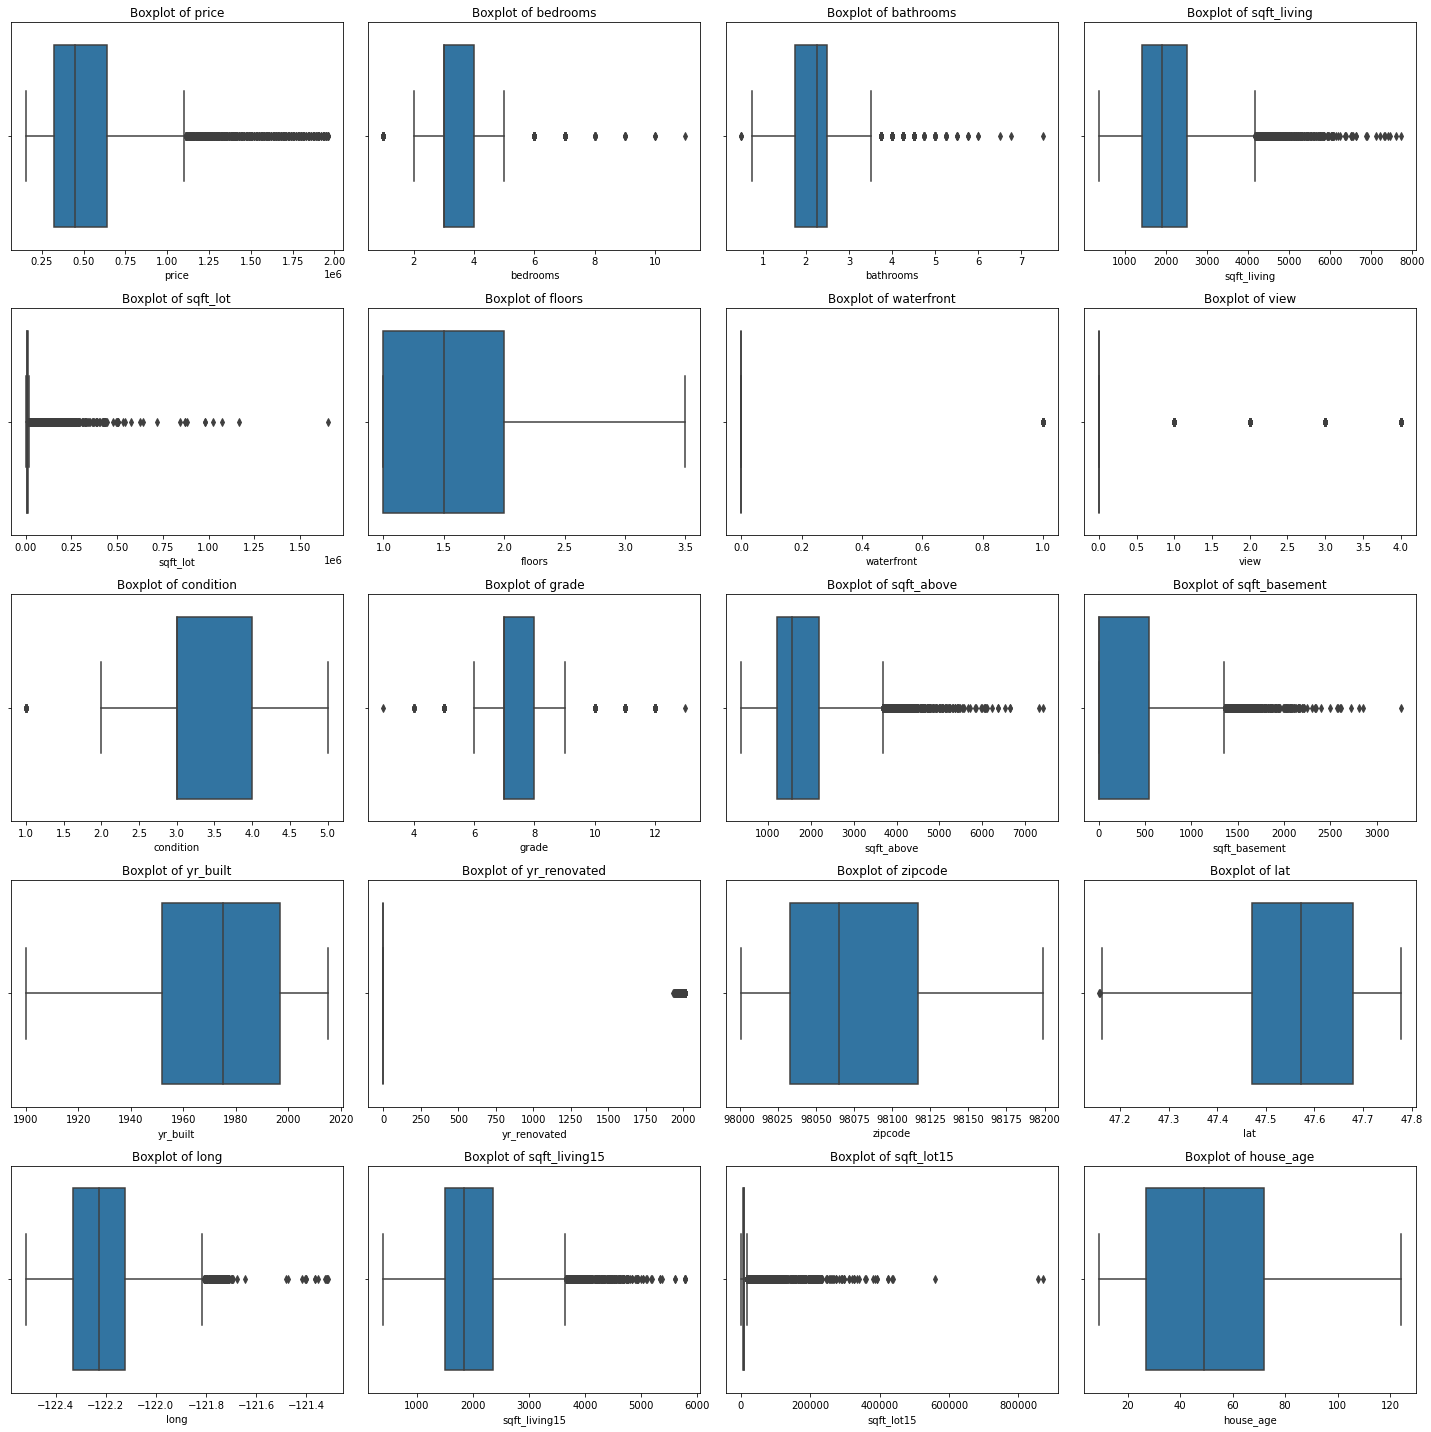

In [20]:
# Inital data exploration
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Box plot of numerical columns
# Calculate the number of rows and columns for the subplot grid
num_features = len(numerical_cols)
num_cols = 4  # Number of columns in the subplot grid (adjust as needed)
num_rows = int(np.ceil(num_features / num_cols))  # Calculate the number of rows needed

# Create a figure with enough space for all features
plt.figure(figsize=(num_cols * 5, num_rows * 4))  # Adjust based on the number of rows and columns

# Create subplots for each feature
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # Dynamic grid size
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('')

plt.tight_layout()
plt.show()

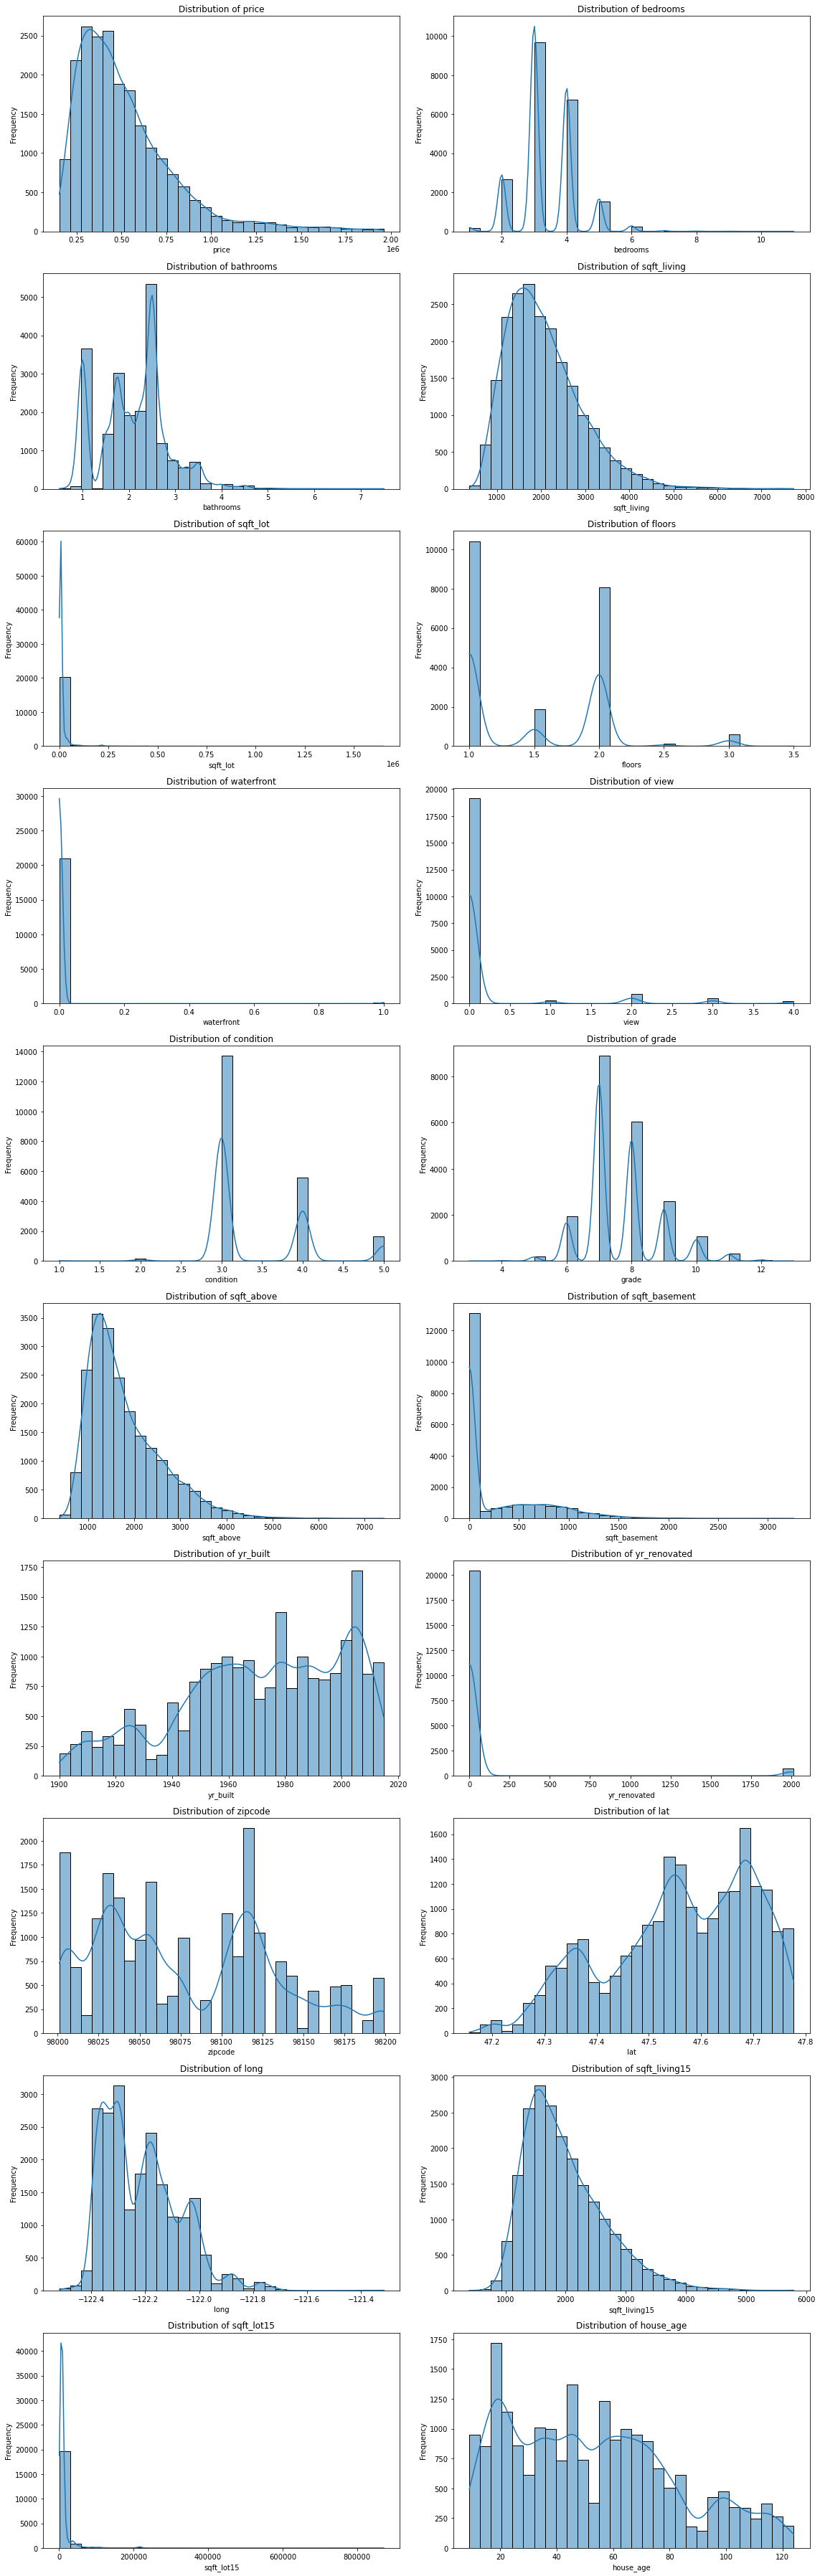

In [21]:
# Assuming df is your DataFrame with both numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Define the layout for the subplots
num_cols = 2  # Number of columns for subplots
num_numerical = len(numerical_cols)
num_categorical = len(categorical_cols)
num_rows_numerical = (num_numerical // num_cols) + (num_numerical % num_cols)
num_rows_categorical = (num_categorical // num_cols) + (num_categorical % num_cols)
num_rows_total = num_rows_numerical + num_rows_categorical

# Create a figure with enough space for the selected features
plt.figure(figsize=(16, 5 * num_rows_total))

# Plot numerical features
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(num_rows_total, num_cols, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Plot categorical features
for j, feature in enumerate(categorical_cols, 1):
    plt.subplot(num_rows_total, num_cols, num_numerical + j)
    sns.countplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

plt.tight_layout()
plt.show()


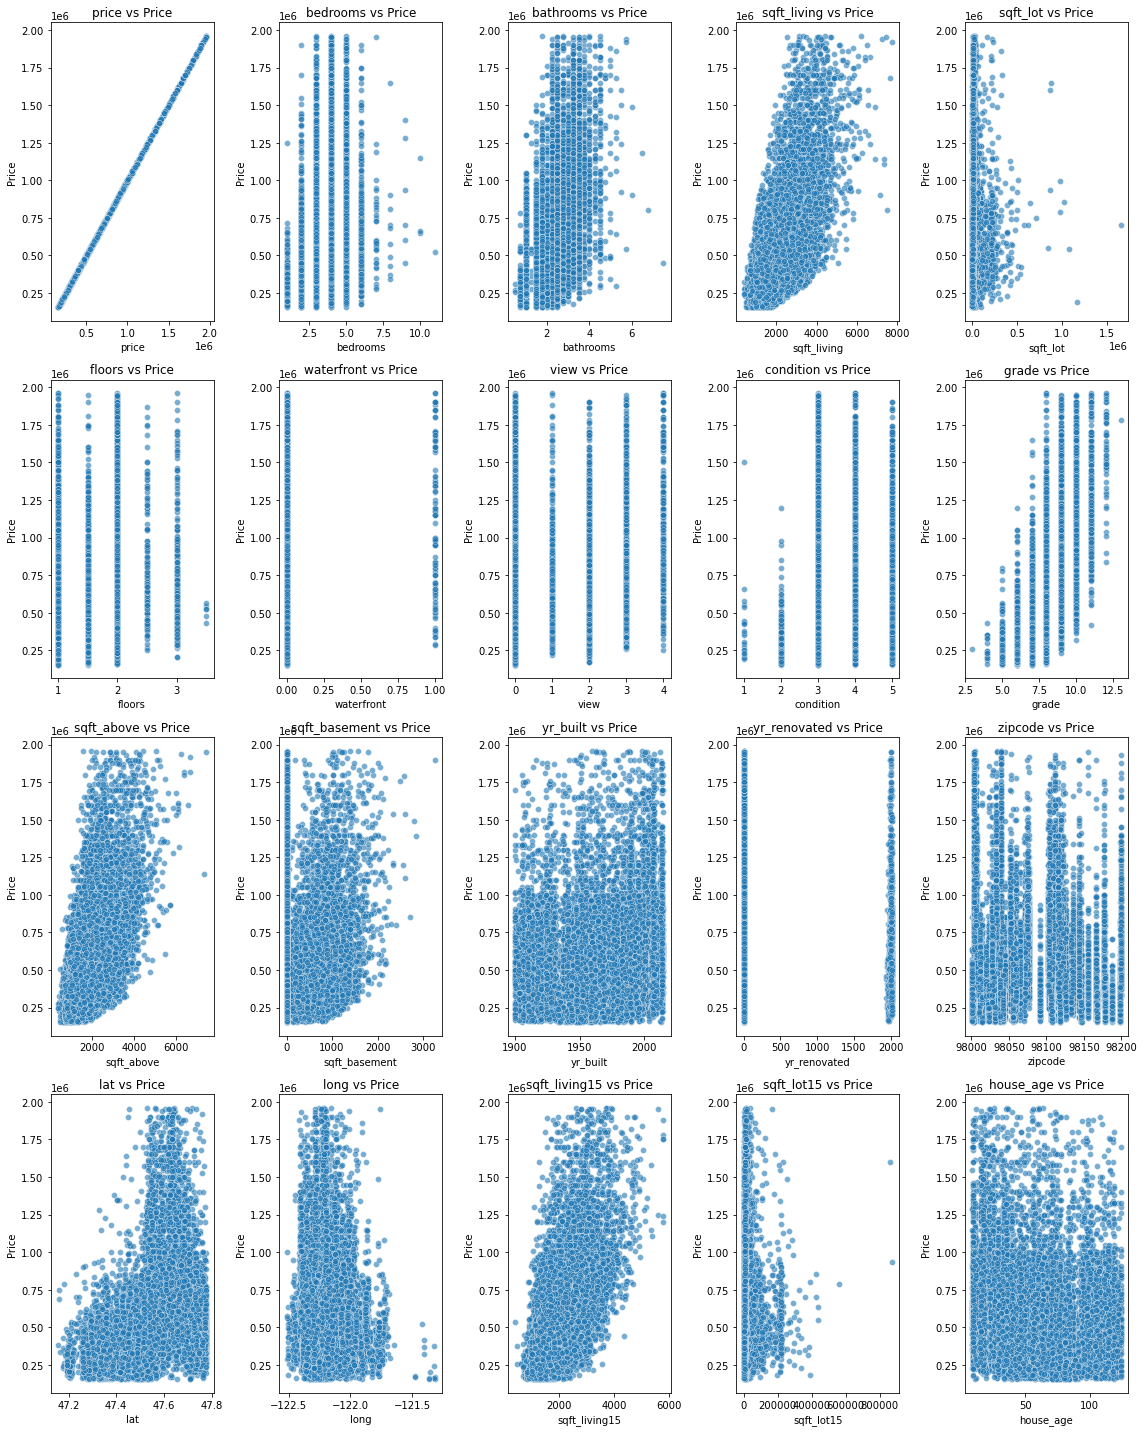

In [22]:
# Define the layout for the subplots
num_cols = 5  # Number of columns for subplots
num_numerical = len(numerical_cols)
num_rows_numerical = (num_numerical // num_cols) + (num_numerical % num_cols)

# Create a figure with enough space for the selected features
plt.figure(figsize=(16, 5 * num_rows_numerical))

# Plot scatterplots of numerical features against 'price'
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(num_rows_numerical, num_cols, i)
    sns.scatterplot(x=df[feature], y=df['price'], alpha=0.6)
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

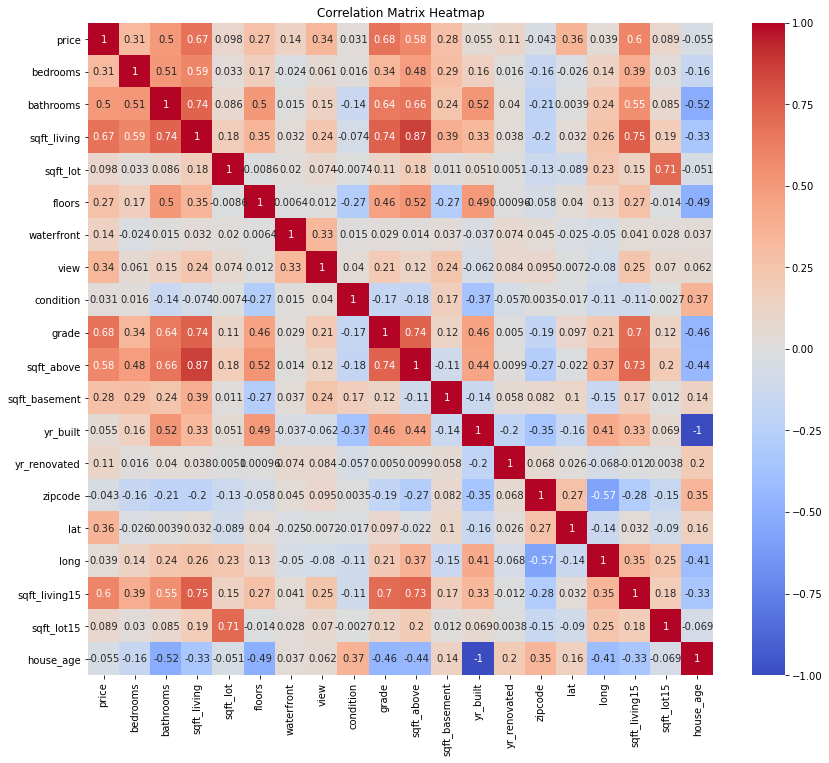

In [23]:
# Correlation heatmap of columns
correlation_matrix =  df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
# Average price by number of bedrooms
avg_price_by_bedrooms = df.groupby('bedrooms')['price'].mean().sort_values()
print("\nAverage Price by Number of Bedrooms:")
print(avg_price_by_bedrooms)


Average Price by Number of Bedrooms:
bedrooms
1     341996.051429
2     409824.064759
3     462095.103341
11    520000.000000
4     608696.019675
6     692260.282946
8     694600.000000
7     698030.818182
5     699545.711676
10    820000.000000
9     893999.833333
Name: price, dtype: float64


In [25]:
# Average price by grade
avg_price_by_grade = df.groupby('grade')['price'].mean().sort_values()
print("Average Price by Grade:")
print(avg_price_by_grade)

Average Price by Grade:
grade
3     2.620000e+05
4     2.731906e+05
5     2.791364e+05
6     3.114850e+05
7     4.038634e+05
8     5.413675e+05
9     7.621449e+05
10    9.862106e+05
11    1.221115e+06
12    1.551415e+06
13    1.780000e+06
Name: price, dtype: float64


In [26]:
# setting the target variable as price; check how the predictor variables correlate with price and identify the highest correlated

df.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.675227
sqft_living      0.672833
sqft_living15    0.597233
sqft_above       0.578180
bathrooms        0.497971
lat              0.358664
view             0.342454
bedrooms         0.313038
sqft_basement    0.275492
floors           0.271710
waterfront       0.142665
yr_renovated     0.110183
sqft_lot         0.098249
sqft_lot15       0.088564
yr_built         0.054534
long             0.039439
condition        0.031056
zipcode         -0.043097
house_age       -0.054534
Name: price, dtype: float64

## Data Modelling